In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('P:/python/Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data1 = data.copy()

In [4]:
data1['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [5]:
data1['Sales'] = pd.cut(data1['Sales'], bins = [0,8,16], labels = ['low','high'])
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,low,139,23,3,37,120,Medium,55,11,No,Yes
397,low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
data1['Sales'].value_counts()

low     235
high    163
Name: Sales, dtype: int64

In [7]:
le = LabelEncoder()
data1['Sales'] = le.fit_transform(data1['Sales'])
data1['ShelveLoc'] = le.fit_transform(data1['ShelveLoc'])
data1['Urban'] = le.fit_transform(data1['Urban'])
data1['US'] = le.fit_transform(data1['US'])
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [8]:
x = data1.iloc[:,1:]
y = data1.iloc[:,0]
print(x)
y.head()

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

0    0
1    0
2    0
3    1
4    1
Name: Sales, dtype: int32

In [9]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=40)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(300, 10) (100, 10) (300,) (100,)


### Building Decision Tree using Entropy

[Text(418.5, 475.65000000000003, 'X[5] <= 0.5\nentropy = 1.038\nsamples = 300\nvalue = [129, 169, 2]'),
 Text(209.25, 339.75, 'X[4] <= 100.5\nentropy = 0.66\nsamples = 76\nvalue = [13, 63, 0]'),
 Text(104.625, 203.85000000000002, 'X[1] <= 57.0\nentropy = 0.999\nsamples = 23\nvalue = [11, 12, 0]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.896\nsamples = 16\nvalue = [11, 5, 0]'),
 Text(313.875, 203.85000000000002, 'X[2] <= 15.5\nentropy = 0.232\nsamples = 53\nvalue = [2, 51, 0]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(627.75, 339.75, 'X[5] <= 1.5\nentropy = 1.063\nsamples = 224\nvalue = [116, 106, 2]'),
 Text(523.125, 203.85000000000002, 'X[4] <= 135.0\nentropy = 0.861\nsamples = 65\nvalue = [50, 14, 1]'),
 Text(470.8125, 67.94999999999999, 'entropy = 0.591\n

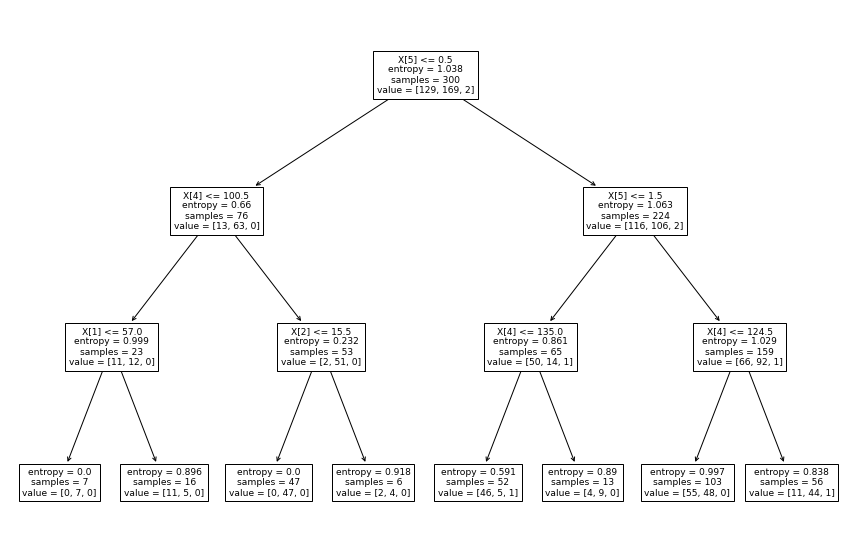

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)
plt.figure(figsize = (15, 10))
tree.plot_tree(model)

In [11]:
preds = model.predict(x_test)
preds

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [12]:
print(f' model accuracy is {(model.score(x_test,y_test))*100}')

 model accuracy is 64.0


In [13]:
confusion_matrix = confusion_matrix(y_test,preds)
print (confusion_matrix)

[[28  6]
 [30 36]]


In [14]:
print(f' model accuracy is {((28+36)/(28+6+30+36))*100}')

 model accuracy is 64.0


### Building Decision Tree using Gini impurity

[Text(368.28, 489.24, 'X[5] <= 0.5\ngini = 0.498\nsamples = 300\nvalue = [129, 169, 2]'),
 Text(167.39999999999998, 380.52000000000004, 'X[4] <= 93.0\ngini = 0.284\nsamples = 76\nvalue = [13, 63, 0]'),
 Text(66.96, 271.8, 'X[1] <= 57.0\ngini = 0.48\nsamples = 15\nvalue = [9, 6, 0]'),
 Text(33.48, 163.08000000000004, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(100.44, 163.08000000000004, 'X[1] <= 115.0\ngini = 0.298\nsamples = 11\nvalue = [9, 2, 0]'),
 Text(66.96, 54.360000000000014, 'gini = 0.18\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(133.92, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84, 271.8, 'X[1] <= 118.0\ngini = 0.123\nsamples = 61\nvalue = [4, 57, 0]'),
 Text(234.35999999999999, 163.08000000000004, 'X[6] <= 30.0\ngini = 0.095\nsamples = 60\nvalue = [3, 57, 0]'),
 Text(200.88, 54.360000000000014, 'gini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(267.84, 54.360000000000014, 'gini = 0.037\nsamples = 53\nvalue = [1, 52, 0]'),
 Text(3

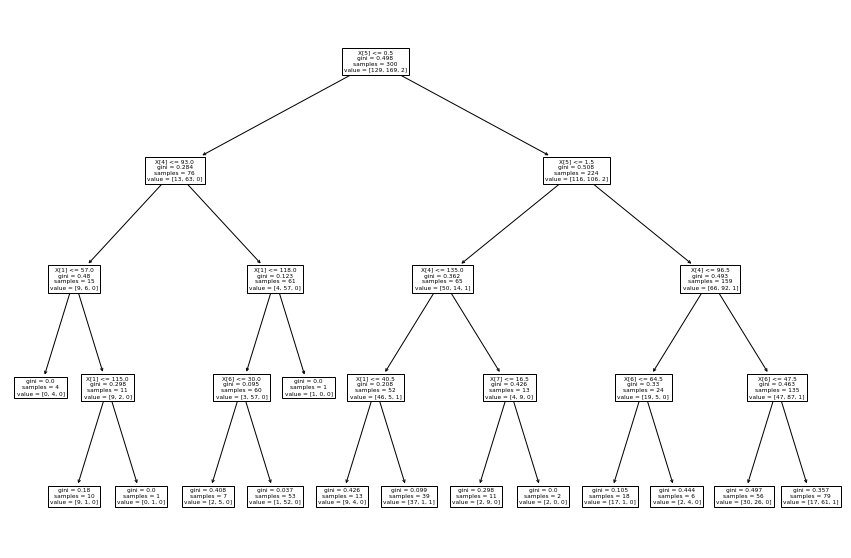

In [15]:
model_gini = DecisionTreeClassifier(criterion ='gini', max_depth=4)
model_gini.fit(x_train, y_train)
plt.figure(figsize = (15, 10))
tree.plot_tree(model_gini)

In [16]:
preds_gini = model_gini.predict(x_test)
preds_gini

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [21]:
print(f' model accuracy is {(model_gini.score(x_test,y_test))*100}')

 model accuracy is 73.0


Firstly i have load a dataset then as in the problem statement for finding the high sales i have divided sales into to named as low and high by the help of pandas cut method. After that with the labelencoder method i have done labelencoding for the necessary columns. After that i have divided the data into input and output by naming as x and y. Then by using trian_test_split ihave divided data into xtrian, ytrian, xtest, ytest by giving test = 25% and random state = 40. Then i have build a DecisionTreeClassifier model with criterion as entropy and by giving xtrain and ytrain. And i have plotted decision tree with depth 3. Then i have done prediction by giving xtest. And i have fing model accuracy is 64%. Next i have build a DecisionTreeClassifier model with criterion as Gini and by giving xtrain and ytrain. And i have plotted decision tree with depth 4. Then i have done prediction by giving xtest. And i have fing model accuracy is 73%. 